### Analysis

What does total healthcare spending look like from 2002 to 2020 when sorted by sex, by age group, and lastly by sex and age group?

    Based on the line charts created in our analysis, we can see that spending for females consistently outpaced males from 2002 to 2020. 
    Total healthcare spending for Females went from $778,215 millions in 2002 to $1,818,581 millions in 2020, while spending from Males went from 
    $587,266 millions to $1,548,394 millions. 

    The highest healthcare spending occurred in the 45-64 age group throughout all the years, but the 65-84 age group is encroaching on this 
    spending as of 2020. The lowest healthcare spending is within the 85+ plus age group, probably due to the smaller size of this population
    as individuals pass.

    Lastly, when we look at spending per sex and age group for females, the spending between the three age groups (45-64, 65-84, & 19-44) 
    is pretty similar, with some fluctuations over the years. In 2002, the 65-84 age group was just over the other two and then dipped in
    the middle from 2006 to 2018, then shot up in 2020 (most likely due to COVID-19 spending per CMS). The 0-18 and 85+ show the lowest 
    spending across all of the years, with under $156,000 millions each in 2020.

    Spending per sex and age group for males follows a similar pattern between age groups, with the 45-64 age group showing the highest
    expenditure and the 85+ age group the lowest. Unlike health care spending for females, spending for males across age groups does not
    intertwine over the years; all age groups continuously increase at similar rates. The 65-84 group is showing a spike in 2020, like 
    female spending, but it does not surpass the 45-64 group as female expenditure does.

What does healthcare spedning look like for specific services? We broke out spending for Medicaid, Prescription Drugs, and 

What trends and estimates can we make from total speding by using regression charts?

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# We want to know how total healthcare spending is trending by sex, by age group, and lastly by sex and age group for everyother year from 2002 to 2020.
# This data will help us see trends in spending over the last 18 years.

In [3]:
# First we have to pull in our CSV file containing all of our data
# Importing the health data CSV file
health_data = os.path.join ('.' , 'Datasets' , 'age_and_sex_IP.csv')
health_data = pd.read_csv(health_data)
health_data.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


In [4]:
# Filtering the healthcare data to total spending by payer, service, and age group.
health_data_clean = health_data[(health_data["Payer"]== "Total") & (health_data["Service"]== "Total Personal Health Care") & (health_data["Age Group"]== "Total")]
health_data_clean.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1140,Total,Total Personal Health Care,Total,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Total,Total Personal Health Care,Total,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [5]:
# Filtering the healthcare data to get the total spending values by sex 
health_data_sex = health_data_clean[health_data_clean["Sex"]!= "Total"]
health_data_sex.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1140,Total,Total Personal Health Care,Total,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Total,Total Personal Health Care,Total,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [6]:
# Reducing the datafram information to only include sex and healthcare spending data per year
reduced_health_data_sex = health_data_sex.loc[:,["Sex", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
reduced_health_data_sex

,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1140,Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
1146,Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [7]:
# Resetting the index of the dataframe to sex in order to create a line graph
sex_index = reduced_health_data_sex.set_index("Sex")
sex_index 

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Sex,,,,,,,,,,
Males,587266,680026,783910,872613,965308,1050368,1136102,1246245,1354777,1548394
Females,778215,902354,1022542,1134540,1215153,1295834,1390984,1549313,1664992,1818581


In [8]:
# Flipping the dataframe data in order to create a line graph for total spending by sex over the years
flip_sex_index = sex_index.T
flip_sex_index 

Sex,Males,Females
2002,587266,778215
2004,680026,902354
2006,783910,1022542
2008,872613,1134540
2010,965308,1215153
2012,1050368,1295834
2014,1136102,1390984
2016,1246245,1549313
2018,1354777,1664992
2020,1548394,1818581


In [9]:
print(flip_sex_index.loc[["2002"], "Males"])
print(flip_sex_index.loc[["2020"], "Males"])

print(flip_sex_index.loc[["2002"], "Females"])
print(flip_sex_index.loc[["2020"], "Females"])

2002    587266
Name: Males, dtype: int64
2020    1548394
Name: Males, dtype: int64
2002    778215
Name: Females, dtype: int64
2020    1818581
Name: Females, dtype: int64


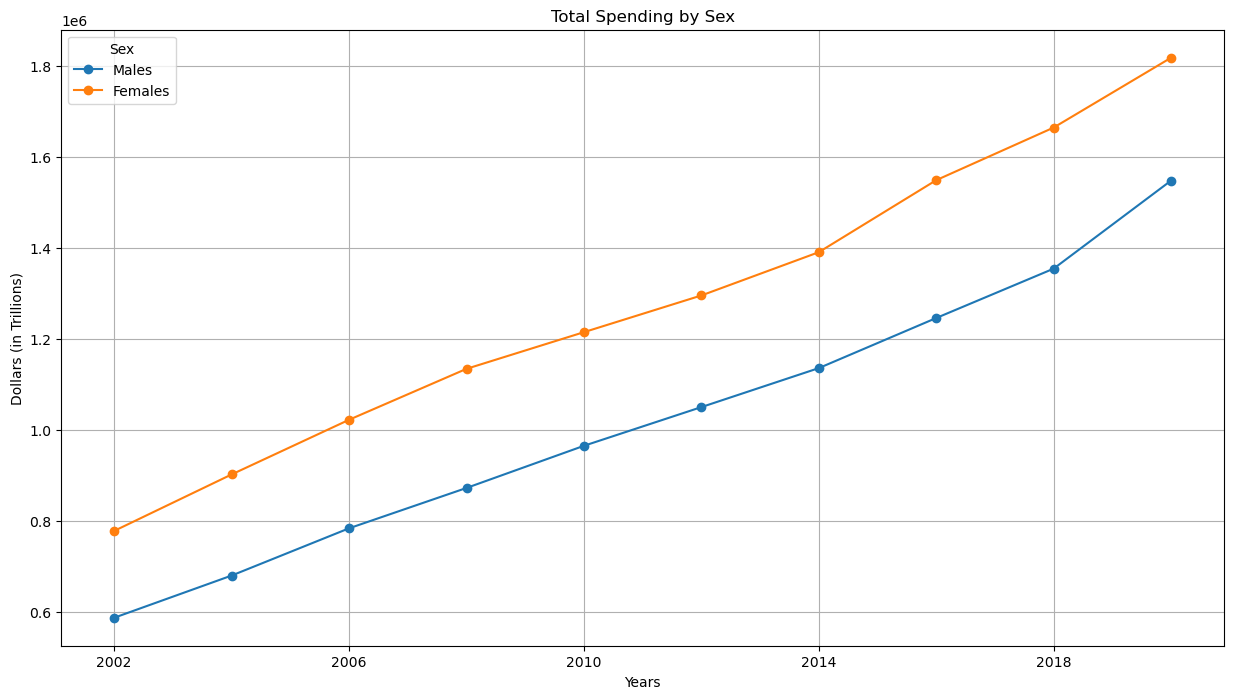

In [10]:
#Creating the line graph for the dataframe
flip_sex_index.plot(kind='line', marker='o', figsize=(15,8))

plt.title("Total Spending by Sex")
plt.xlabel("Years")
plt.ylabel("Dollars (in Trillions)")
plt.grid(True)

#Exporting the plot to a PNG
plt.savefig("figures/total_spending_sex.png")

plt.show()

In [14]:
# Using the health dataset dataframe to show the total healthcare spending by age group
health_data.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


In [23]:
# Filtering the dataset to get total healthcare spending by payer, serive, and sex.
age_totals = health_data[(health_data["Payer"]== "Total") & (health_data["Service"]== "Total Personal Health Care") & (health_data["Sex"]== "Total")]
age_totals.head() 

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533


In [25]:
# Filtering the health data to remove total spending in the age group column.
totals_age_group = age_totals[age_totals["Age Group"] != "Total"]
totals_age_group

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
1139,Total,Total Personal Health Care,85+,Total,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [27]:
# Removing payer and service columns
final_age_groups = totals_age_group.loc[:,["Age Group", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_age_groups

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1135,0-18,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,19-44,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,45-64,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,65-84,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
1139,85+,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [29]:
# Setting Age Group as the index for line graph plotting
age_group = final_age_groups.set_index("Age Group")
age_group

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
19-44,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
45-64,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
65-84,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533
85+,103762,120763,138963,157638,173383,187353,195974,203613,220623,239402


In [31]:
# Flipping the axis of the data to create the line graph
age_group_flip = age_group.T
age_group_flip

Age Group,0-18,19-44,45-64,65-84,85+
2002,178448,331965,382688,368617,103762
2004,202201,372438,464516,422462,120763
2006,232989,417377,549813,467308,138963
2008,250925,437974,627062,533554,157638
2010,270828,474803,683349,578098,173383
2012,287823,502438,734607,633981,187353
2014,288509,553743,815413,673445,195974
2016,297986,637259,904083,752617,203613
2018,308435,692849,948257,849605,220623
2020,324242,759960,1039838,1003533,239402


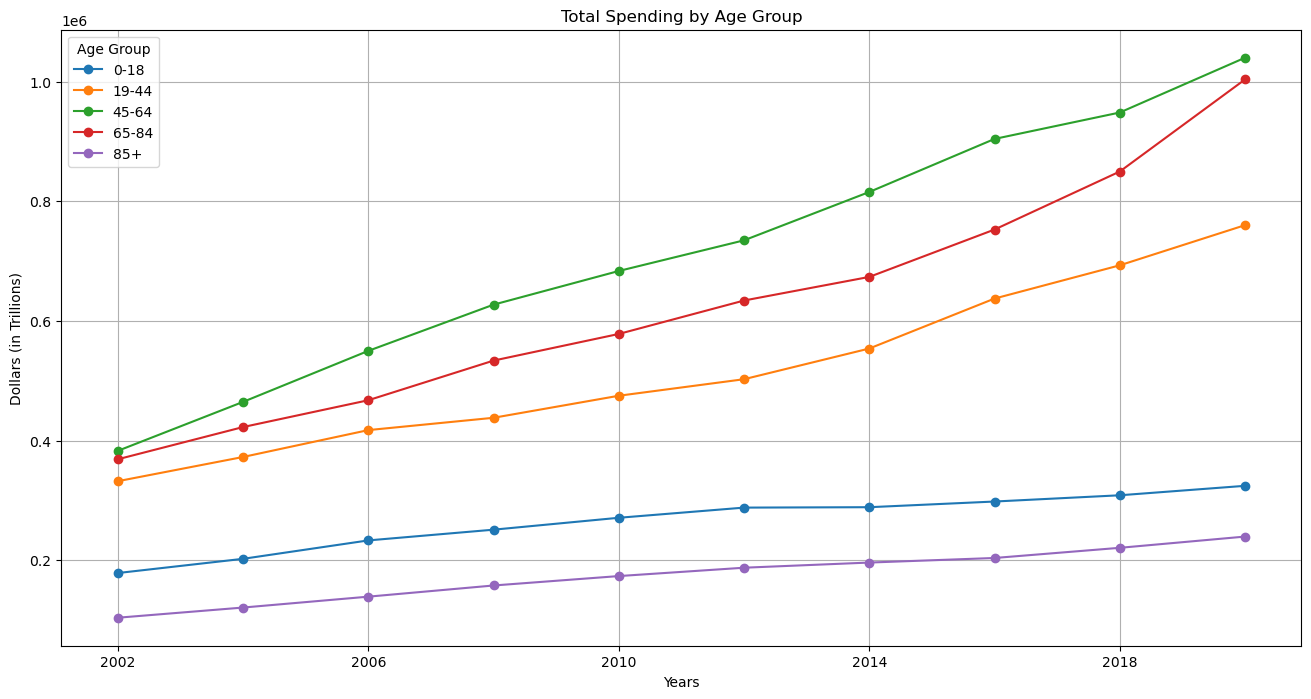

In [33]:
# Creating a line chart from the dataframe to show total spending by age group 
age_group_flip.plot(kind='line', marker='o', figsize=(16,8))

plt.title("Total Spending by Age Group")
plt.xlabel("Years")
plt.ylabel("Dollars (in Trillions)")
plt.grid(True)

plt.savefig("figures/total_spending_age.png")

plt.show()

In [35]:
# Using the health dataset dataframe to show the total healthcare spending by sex and age group
health_data.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
0,Medicaid,Dental Services,Total,Total,3709,4264,4791,6246,8392,8493,9773,11889,12644,12637
1,Medicaid,Dental Services,0-18,Total,2085,2591,2938,3737,5012,4989,5216,6195,6340,6246
2,Medicaid,Dental Services,19-44,Total,937,984,1077,1405,1929,1938,2480,3029,3270,3315
3,Medicaid,Dental Services,45-64,Total,433,440,515,733,974,1071,1543,1952,2088,2117
4,Medicaid,Dental Services,65-84,Total,207,202,211,291,358,369,400,543,728,738


In [37]:
# Filtering the dataset to get total spending by payer and total personal care service
age_sex = health_data[(health_data["Payer"]== "Total") & (health_data["Service"]== "Total Personal Health Care")]
age_sex.head()

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1134,Total,Total Personal Health Care,Total,Total,1365481,1582380,1806451,2007153,2180461,2346202,2527086,2795558,3019769,3366975
1135,Total,Total Personal Health Care,0-18,Total,178448,202201,232989,250925,270828,287823,288509,297986,308435,324242
1136,Total,Total Personal Health Care,19-44,Total,331965,372438,417377,437974,474803,502438,553743,637259,692849,759960
1137,Total,Total Personal Health Care,45-64,Total,382688,464516,549813,627062,683349,734607,815413,904083,948257,1039838
1138,Total,Total Personal Health Care,65-84,Total,368617,422462,467308,533554,578098,633981,673445,752617,849605,1003533


In [39]:
# Filtering down the data to total spending per age group and sex
age_sex_group = age_sex[(age_sex["Age Group"] != "Total") & (age_sex["Sex"] != "Total")]
age_sex_group

,Payer,Service,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1141,Total,Total Personal Health Care,0-18,Males,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
1142,Total,Total Personal Health Care,19-44,Males,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
1143,Total,Total Personal Health Care,45-64,Males,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
1144,Total,Total Personal Health Care,65-84,Males,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
1145,Total,Total Personal Health Care,85+,Males,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889
1147,Total,Total Personal Health Care,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,Total,Total Personal Health Care,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,Total,Total Personal Health Care,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,Total,Total Personal Health Care,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
1151,Total,Total Personal Health Care,85+,Females,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [40]:
# Removing the payer and service columns
final_age_sex_groups = age_sex_group.loc[:,["Age Group", "Sex", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_age_sex_groups

,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1141,0-18,Males,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
1142,19-44,Males,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
1143,45-64,Males,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
1144,65-84,Males,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
1145,85+,Males,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889
1147,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
1151,85+,Females,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [43]:
# Filtering the datafame down to only spending for females by age group
female_age_groups = final_age_sex_groups[final_age_sex_groups["Sex"] != "Males"]
female_age_groups

,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1147,0-18,Females,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,19-44,Females,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,45-64,Females,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,65-84,Females,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
1151,85+,Females,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [45]:
# Removing the sex column now that the information is only for females so we can have the age group as our key
final_female_age_group = female_age_groups.loc[:, ["Age Group","2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_female_age_group 

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1147,0-18,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
1148,19-44,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
1149,45-64,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
1150,65-84,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
1151,85+,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [47]:
# Setting age group as our key to prepapre the dataframe for plotting
final_female_age = final_female_age_group.set_index("Age Group")
final_female_age 

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,85543,96672,108695,115940,126545,137233,137644,139529,144977,150846
19-44,206495,234299,262160,280048,296160,310934,338761,391206,431197,461702
45-64,200289,247272,292000,329676,354531,373297,413856,475154,487918,523367
65-84,209361,236079,259063,297283,317264,344705,367161,406104,454100,527153
85+,76528,88032,100624,111594,120653,129665,133562,137319,146800,155513


In [49]:
# Flipping our dataframe to prepapre for plotting

flip_final_female_age = final_female_age.T
flip_final_female_age 

Age Group,0-18,19-44,45-64,65-84,85+
2002,85543,206495,200289,209361,76528
2004,96672,234299,247272,236079,88032
2006,108695,262160,292000,259063,100624
2008,115940,280048,329676,297283,111594
2010,126545,296160,354531,317264,120653
2012,137233,310934,373297,344705,129665
2014,137644,338761,413856,367161,133562
2016,139529,391206,475154,406104,137319
2018,144977,431197,487918,454100,146800
2020,150846,461702,523367,527153,155513


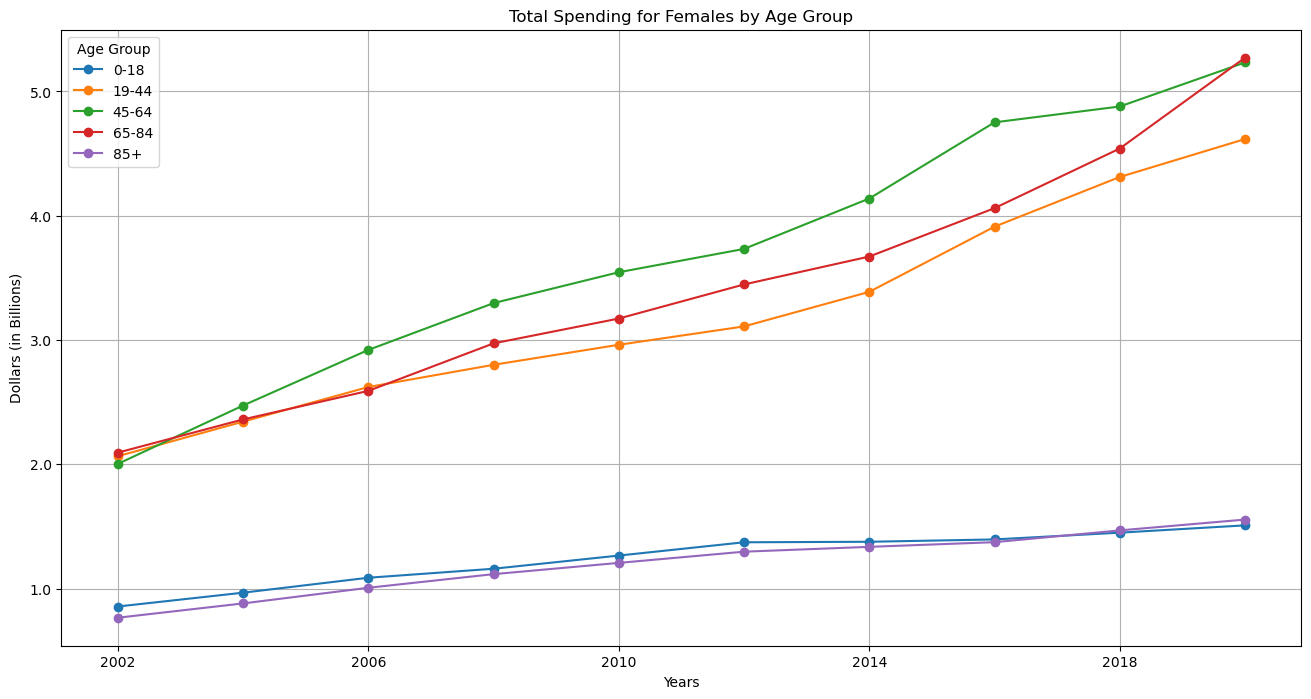

In [51]:
# Using the dataframe to plot total spending for females by age group in a line chart

flip_final_female_age.plot(kind='line', marker='o', figsize=(16,8))

plt.title("Total Spending for Females by Age Group")
plt.xlabel("Years")
plt.ylabel("Dollars (in Billions)")
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 100000)))

plt.savefig("figures/total_spending_sex_age_female.png")

plt.show()

In [52]:
# Filtering the datafame down to only spending for males by age group
male_age_group = final_age_sex_groups[final_age_sex_groups["Sex"] != "Females"]
male_age_group

,Age Group,Sex,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1141,0-18,Males,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
1142,19-44,Males,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
1143,45-64,Males,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
1144,65-84,Males,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
1145,85+,Males,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889


In [53]:
# Removing the sex column now that the information is only for males so we can have the age group as our key
final_male_age_group = male_age_group.loc[:, ["Age Group","2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016", "2018", "2020"]]
final_male_age_group

,Age Group,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
1141,0-18,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
1142,19-44,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
1143,45-64,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
1144,65-84,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
1145,85+,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889


In [55]:
# Setting age group as our key to prepapre the dataframe for plotting
final_male_age = final_male_age_group.set_index("Age Group")
final_male_age 

,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020
Age Group,,,,,,,,,,
0-18,92905,105530,124294,134985,144282,150591,150865,158457,163458,173397
19-44,125471,138139,155217,157926,178643,191504,214982,246053,261652,298258
45-64,182399,217244,257813,297386,328818,361310,401557,428929,460339,516471
65-84,159257,186383,208246,236271,260835,289276,306285,346513,395505,476379
85+,27234,32731,38340,46045,52729,57688,62413,66293,73824,83889


In [59]:
# Flipping our dataframe to prepapre for plotting

flip_final_male_age = final_male_age.T
flip_final_male_age

Age Group,0-18,19-44,45-64,65-84,85+
2002,92905,125471,182399,159257,27234
2004,105530,138139,217244,186383,32731
2006,124294,155217,257813,208246,38340
2008,134985,157926,297386,236271,46045
2010,144282,178643,328818,260835,52729
2012,150591,191504,361310,289276,57688
2014,150865,214982,401557,306285,62413
2016,158457,246053,428929,346513,66293
2018,163458,261652,460339,395505,73824
2020,173397,298258,516471,476379,83889


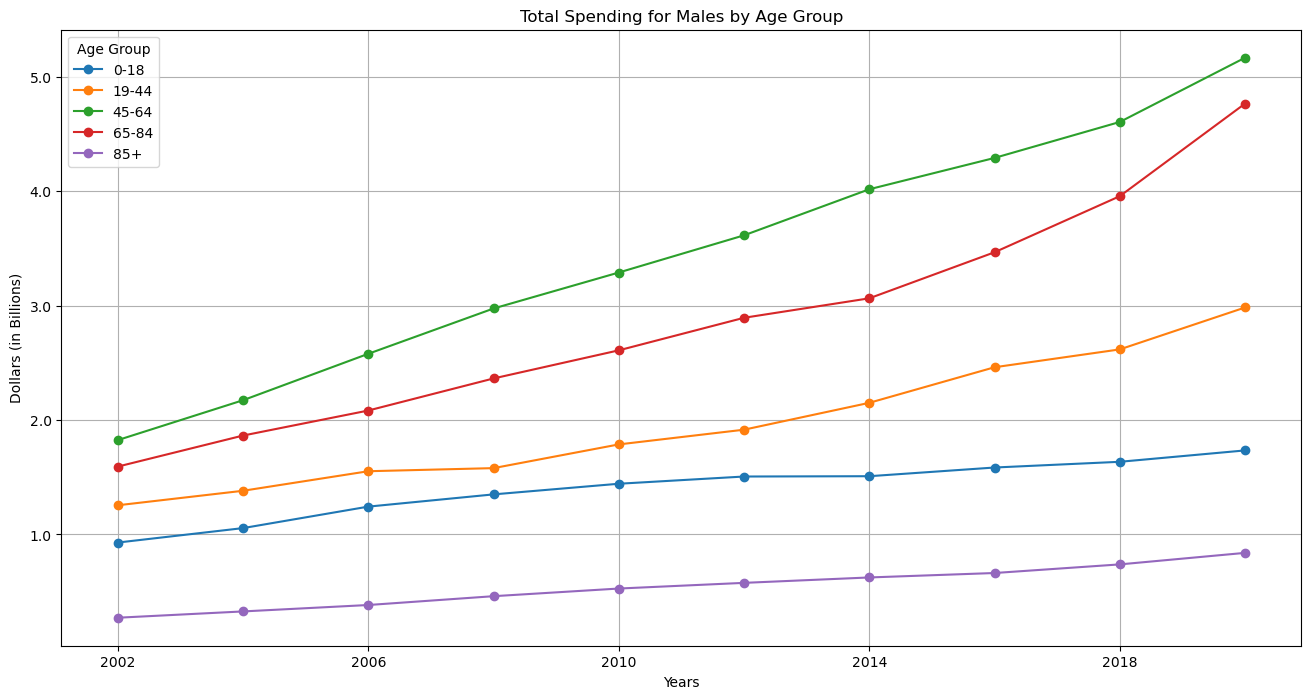

In [61]:
# Using the datframe to plot total spending for males by age group in a line chart

flip_final_male_age.plot(kind='line', marker='o', figsize=(16,8))

plt.title("Total Spending for Males by Age Group")
plt.xlabel("Years")
plt.ylabel("Dollars (in Billions)")
plt.grid(True)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}'.format(x / 100000)))

plt.savefig("figures/total_spending_sex_age_male.png")

plt.show()